In [2]:
import pandas as pd 
import folium 
import matplotlib.pyplot as plt 

In [3]:
file_path = "/Users/kaivalyasatav/Documents/Cognifyz/Level 1/Task 1/Dataset .csv"

In [4]:
data = pd.read_csv(file_path)

In [5]:
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]

In [6]:
restaurant_map = folium.Map(location=map_center, zoom_start=12)

In [8]:
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - Rating: {row['Aggregate rating']}",
        icon = folium.Icon(color= 'blue' if row['Aggregate rating']>= 4 else 'red')
    ).add_to(restaurant_map)

In [9]:
restaurant_map.save('restaurant_map.html')

In [10]:
city_distribution = data.groupby('City').size().reset_index(name='Count')

In [11]:
correlation_latitude = data['Latitude'].corr(data['Aggregate rating'])
correlation_longitude = data['Longitude'].corr(data['Aggregate rating'])

In [12]:
print("City Distribution:")
print(city_distribution)
print(f"Correlation between Latitude and Rating: {correlation_latitude}")
print(f"Correlation between Longitude and Rating: {correlation_longitude}")

City Distribution:
                City  Count
0          Abu Dhabi     20
1               Agra     20
2          Ahmedabad     21
3             Albany     20
4          Allahabad     20
..               ...    ...
136          Weirton      1
137  Wellington City     20
138   Winchester Bay      1
139          Yorkton      1
140        ��stanbul     14

[141 rows x 2 columns]
Correlation between Latitude and Rating: 0.0005155806902360251
Correlation between Longitude and Rating: -0.1168175773454043


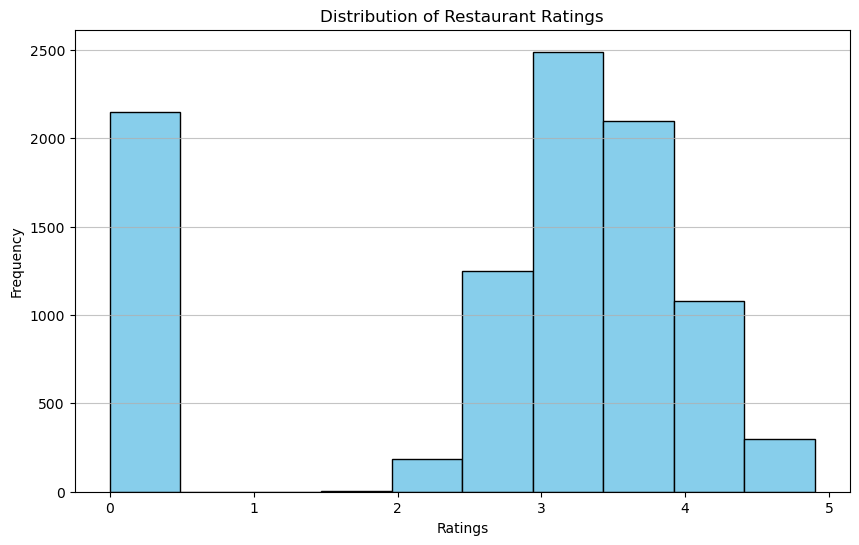

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()